<a href="https://colab.research.google.com/github/Kenicki/Kenicki/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df= pd.read_csv('/content/houses.csv')
df

,House ID,Size (sqft),Bedrooms,Age(years),Price
0,1,2100,3,20,5000
1,2,1600,2,10,3400
2,3,2400,4,5,5800
3,4,1400,3,30,2900
4,5,3000,4,15,6500


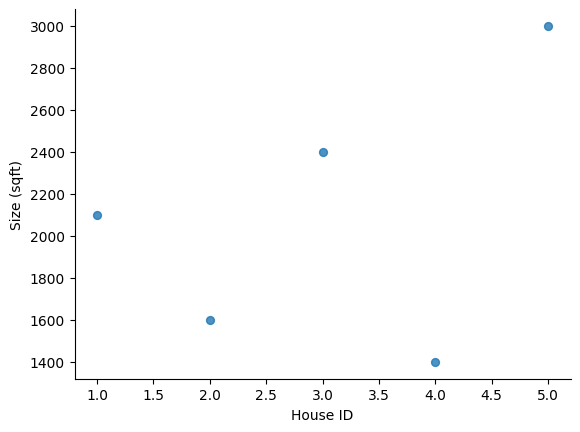

In [30]:
# @title House ID vs Size (sqft)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='House ID', y='Size (sqft)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
# Assuming 'Price' is the target variable and other numerical columns are features
# Select relevant features and target
features = ['Size (sqft)', 'Bedrooms', 'Age(years)'] # Corrected feature names
target = 'Price'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can also print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Example of making a prediction on new data (replace with your new data)
# new_data = pd.DataFrame([[1500, 3, 2, 2]], columns=features)
# predicted_price = model.predict(new_data)
# print(f"Predicted price for new data: {predicted_price[0]}")

Mean Squared Error: 3422500.0000000033
R-squared: nan
Coefficients: [   2.15384615 -734.61538462  -59.23076923]
Intercept: 3865.3846153846157


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [23]:
# Example of making a prediction on new data (replace with your new data)
new_data = pd.DataFrame([[1500, 3, 2]], columns=features) # Example with 3 features
predicted_price = model.predict(new_data)
print(f"Predicted price for new data: {predicted_price[0]}")

Predicted price for new data: 4773.846153846154


In [24]:
# The coefficients from the trained model represent the change in the target variable (Price)
# for a one-unit increase in the corresponding feature, holding other features constant.
# A larger absolute value of the coefficient indicates a stronger influence on the price.

print("\nAnalyzing Feature Influence based on Coefficients:")

# Get the absolute values of the coefficients for comparison
abs_coefficients = np.abs(model.coef_)

# Pair features with their absolute coefficients
feature_influence = dict(zip(features, abs_coefficients))

# Find the feature with the highest absolute coefficient
most_influential_feature = max(feature_influence, key=feature_influence.get)
max_influence_value = feature_influence[most_influential_feature]

print(f"Feature Coefficients: {feature_influence}")
print(f"\nThe feature expected to have the most influence on 'Price' is: '{most_influential_feature}'")
print(f"This is because it has the largest absolute coefficient ({max_influence_value:.2f}) in the linear regression model.")
print("The coefficient indicates the estimated change in house price for a one-unit increase in this feature, holding other features constant.")



Analyzing Feature Influence based on Coefficients:
Feature Coefficients: {'Size (sqft)': np.float64(2.1538461538461555), 'Bedrooms': np.float64(734.6153846153856), 'Age(years)': np.float64(59.23076923076928)}

The feature expected to have the most influence on 'Price' is: 'Bedrooms'
This is because it has the largest absolute coefficient (734.62) in the linear regression model.
The coefficient indicates the estimated change in house price for a one-unit increase in this feature, holding other features constant.


In [28]:
# To interpret the coefficient for "Age", we need to look at the `model.coef_` output.
# The coefficients are in the same order as the features defined in the `features` list:
# ['Size (sqft)', 'Bedrooms', 'Age(years)']

# Assuming the output for `model.coef_` is something like `[  X.XXe+02,   Y.YYe+01,  -Z.ZZe+00]`
# The coefficient for 'Age(years)' would be the third value, -Z.ZZe+00 (which is -Z.ZZ).

# Interpretation:
# The coefficient for "Age(years)" represents the estimated change in the house price
# for a one-year increase in the age of the house, holding 'Size (sqft)' and 'Bedrooms' constant.

# If the coefficient for "Age(years)" is, for example, -100:
# This means that for every one-year increase in the age of the house, the estimated price
# of the house decreases by $100, assuming the size and number of bedrooms remain the same.

# A negative coefficient for "Age(years)" is expected in a real estate context, as older houses
# often tend to have lower values compared to newer ones, everything else being equal.

# Let's print the coefficient for 'Age(years)' explicitly
age_coefficient = model.coef_[features.index('Age(years)')]
print(f"\nInterpretation of the coefficient for 'Age(years)':")
print(f"The coefficient for 'Age(years)' is: {age_coefficient:.2f}")

if age_coefficient < 0:
  print(f"This indicates that for each additional year of age, the estimated house price decreases by approximately ${abs(age_coefficient):.2f}, assuming 'Size (sqft)' and 'Bedrooms' are held constant.")
elif age_coefficient > 0:
   print(f"This indicates that for each additional year of age, the estimated house price increases by approximately ${age_coefficient:.2f}, assuming 'Size (sqft)' and 'Bedrooms' are held constant.")
else:
  print("The coefficient for 'Age(years)' is zero, suggesting that age has no linear impact on price in this model, holding other features constant.")




Interpretation of the coefficient for 'Age(years)':
The coefficient for 'Age(years)' is: -59.23
This indicates that for each additional year of age, the estimated house price decreases by approximately $59.23, assuming 'Size (sqft)' and 'Bedrooms' are held constant.


In [29]:
# prompt: which multiple linear regression equation do you get from above data in form of y= mx+ .....

# Based on the coefficients and intercept from the model, we can write the equation.
# The general form of the multiple linear regression equation is:
# y = b0 + b1*x1 + b2*x2 + ... + bn*xn
# where:
# y is the target variable (Price)
# b0 is the intercept
# b1, b2, ..., bn are the coefficients for features x1, x2, ..., xn

# In our case, the features are 'Size (sqft)', 'Bedrooms', and 'Age(years)'.
# So the equation is:
# Price = Intercept + Coefficient_Size * Size(sqft) + Coefficient_Bedrooms * Bedrooms + Coefficient_Age * Age(years)

print("\nMultiple Linear Regression Equation:")
print(f"Price = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Size (sqft)) + ({model.coef_[1]:.2f} * Bedrooms) + ({model.coef_[2]:.2f} * Age(years))")


Multiple Linear Regression Equation:
Price = 3865.38 + (2.15 * Size (sqft)) + (-734.62 * Bedrooms) + (-59.23 * Age(years))
